# Statistics Notebook 02
<br>
This is the second notebook of the series of statistics methods using python modules such as Numpy, SciPy.stats and statmodels. <br>
This notbook covers the methods using Scipuy.stats

### Import required libraries 

In [3]:
import numpy as np
import pandas as pd
from scipy import stats 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
#1 Normal distribution object 
X = stats.norm(1,0.5) # Mean =1 and Standard deviation = 0.5

X is an object that represents a random variable having mean 1 and standard deviation of 0.5. The object X can be used to get other properties of this distribution such as pdf, cdf, sf, ppf, etc. See the examples below. 

Start with descriptive statistics, Mean, standard deviationa and variance 

In [5]:
X.mean()

1.0

In [6]:
X.std()

0.5

In [7]:
X.var()

0.25

"stats" method returns the inputs used to create this object

In [8]:
X.stats() # This returns mean and variance

(array(1.), array(0.25))

I am going to estimate the probability distribution function (pdf) and cumulative distribution function (cdf) here. 

In [9]:
X.pdf([0,1,2])

array([0.10798193, 0.79788456, 0.10798193])

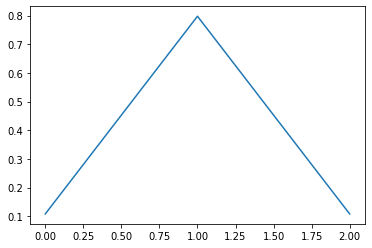

In [10]:
plt.plot([0,1,2], X.pdf([0,1,2]))

Here, I input a list "[0,1,2]" to compute the pdf. pdf method produces the probability to find 0, 1 and 2 in the sample, provided mean is 1 and standard deviation is 0.5. As expected, 1 has a high probability. 0 and 2 have low probabiloties. 

In [11]:
X.pdf([100,101,102])

array([0., 0., 0.])

I replaced the list with "[101,102,103]". Remember that, our random variable object, "X" is created using mean=1 and std = 0.5. Finding a mean of 1 is impossible from this input. Therefore, the pdf is all zero in this case. 

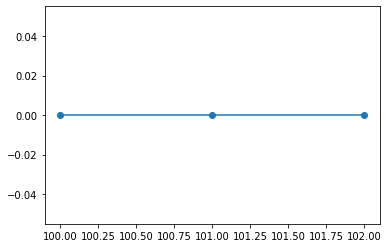

In [12]:
plt.plot([100,101,102], X.pdf([100,101,102]), '-o')

In [16]:
print(X.cdf([0,1,2]))
X.pdf([0,1,2])

[0.02275013 0.5        0.97724987]


array([0.10798193, 0.79788456, 0.10798193])

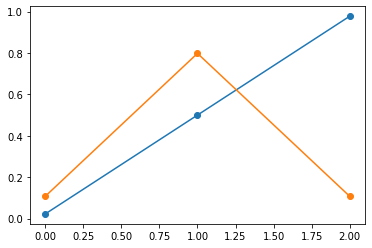

In [19]:
plt.plot(X.cdf([0,1,2]),'-o')
plt.plot(X.pdf([0,1,2]),'-o')

CDF is cumulative distribution function or in plain language accumulated probability <br>
CDF is bound between 0 and 1 
<br> CDF is the sum of area under the PDF curve.
<